In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('credit_DataPrep.csv', sep=';')
df.head(15)

,Gender,Married,Dependents,Education,Employed,ApplicantIncome,Property_Area,Credit_History,Loan_Status
0,0,0,0,0,0,8.674026,0,1.0,0
1,0,1,1,0,0,8.430109,1,1.0,1
2,0,1,0,0,1,8.006368,0,1.0,0
3,0,1,0,1,0,7.856707,0,1.0,0
4,0,0,0,0,0,8.699515,0,1.0,0
5,0,1,2,0,1,8.597297,0,1.0,0
6,0,1,0,1,0,7.754910,0,1.0,0
7,0,1,3,0,0,8.018296,2,0.0,1
8,0,1,2,0,0,8.295549,0,1.0,0
9,0,1,1,0,0,9.460398,2,1.0,1


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Gender','Married','Dependents','Education','Employed','ApplicantIncome','Property_Area','Credit_History','Loan_Status'])

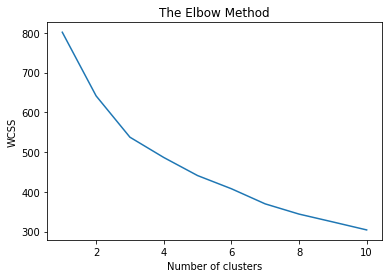

In [4]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

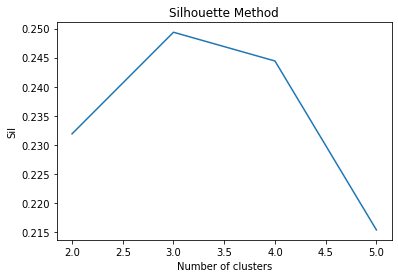

2:0.2318846375435586
3:0.2493612041559971
4:0.24441666619310798
5:0.21535914180919974


In [5]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

Таким образом, по методу локтя и силуета стоит выделит 4 кластера. Проведем ряд экспериментов на предыдущем расбиение с учетом нового эксперимента на 4 кластера.

# Baseline model

In [6]:
# Fitting K-Means to the dataset
km2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(df)
kms2 = KMeans(n_clusters = 2, random_state = 0).fit(df)
pd.DataFrame(kms2.cluster_centers_, columns = ['Gender','Married','Dependents','Education','Employed','ApplicantIncome','Property_Area','Credit_History','Loan_Status']).round(2)

,Gender,Married,Dependents,Education,Employed,ApplicantIncome,Property_Area,Credit_History,Loan_Status
0,0.38,0.0,0.09,0.21,0.13,0.65,0.52,0.85,0.37
1,0.08,1.0,0.33,0.22,0.13,0.66,0.53,0.86,0.28


In [7]:
# Fitting K-Means to the dataset
km3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(df)
kms3 = KMeans(n_clusters = 3, random_state = 0).fit(df)
pd.DataFrame(kms3.cluster_centers_, columns = ['Gender','Married','Dependents','Education','Employed','ApplicantIncome','Property_Area','Credit_History','Loan_Status']).round(2)

,Gender,Married,Dependents,Education,Employed,ApplicantIncome,Property_Area,Credit_History,Loan_Status
0,0.08,1.00,0.33,0.19,0.14,0.66,0.55,0.99,-0.00
1,0.40,0.00,0.09,0.20,0.13,0.65,0.54,0.93,0.31
2,0.08,0.86,0.31,0.31,0.14,0.66,0.45,0.45,1.00


In [8]:
# Fitting K-Means to the dataset
km4 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df)
kms4 = KMeans(n_clusters = 4, random_state = 0).fit(df)
pd.DataFrame(kms4.cluster_centers_, columns = ['Gender','Married','Dependents','Education','Employed','ApplicantIncome','Property_Area','Credit_History','Loan_Status']).round(2)

,Gender,Married,Dependents,Education,Employed,ApplicantIncome,Property_Area,Credit_History,Loan_Status
0,0.05,0.86,0.32,0.31,0.14,0.66,0.46,0.45,1.00
1,-0.00,-0.00,0.08,0.23,0.12,0.66,0.52,0.98,0.28
2,0.00,1.00,0.34,0.18,0.14,0.66,0.52,0.98,-0.00
3,1.00,0.25,0.11,0.17,0.12,0.63,0.62,0.89,0.30


In [9]:
# Fitting K-Means to the dataset
km5 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0).fit_predict(df)
kms5 = KMeans(n_clusters = 5, random_state = 0).fit(df)
pd.DataFrame(kms5.cluster_centers_, columns = ['Gender','Married','Dependents','Education','Employed','ApplicantIncome','Property_Area','Credit_History','Loan_Status']).round(2)

,Gender,Married,Dependents,Education,Employed,ApplicantIncome,Property_Area,Credit_History,Loan_Status
0,0.01,1.0,0.34,0.20,0.06,0.66,0.19,0.99,-0.0
1,0.16,1.0,0.31,0.17,0.22,0.66,0.95,0.99,-0.0
2,0.37,-0.0,0.11,0.22,0.14,0.65,0.46,0.63,1.0
3,0.07,1.0,0.34,0.31,0.13,0.65,0.46,0.53,1.0
4,0.38,-0.0,0.09,0.21,0.13,0.65,0.56,0.98,-0.0


# Variable kernel

In [10]:
X_vk = ['Gender','Married','Dependents','Education','Credit_History','Loan_Status']

In [11]:
# Fitting K-Means to the dataset
km_r = KMeans(n_clusters = 3, random_state = 0).fit(df[X_vk])
km3_vk = km_r.predict(df[X_vk])
km3_vk_centers = pd.DataFrame(km_r.cluster_centers_, columns = ['Gender','Married','Dependents','Education','Credit_History','Loan_Status']).round(2)
km3_vk_centers

,Gender,Married,Dependents,Education,Credit_History,Loan_Status
0,0.39,0.00,0.09,0.18,0.98,0.23
1,0.08,1.00,0.33,0.19,0.99,-0.00
2,0.13,0.75,0.28,0.32,0.46,1.00


In [12]:
# Fitting K-Means to the dataset
km_r = KMeans(n_clusters = 4, random_state = 0).fit(df[X_vk])
km4_vk = km_r.predict(df[X_vk])
km4_vk_centers = pd.DataFrame(km_r.cluster_centers_, columns = ['Gender','Married','Dependents','Education','Credit_History','Loan_Status']).round(2)
km4_vk_centers

,Gender,Married,Dependents,Education,Credit_History,Loan_Status
0,0.20,0.65,0.27,0.30,-0.00,1.00
1,0.37,0.00,0.09,0.21,0.98,0.27
2,0.08,1.00,0.30,0.00,0.99,0.16
3,0.07,0.99,0.43,1.00,0.99,0.23


In [13]:
# Importing hc clusters
import pickle
input = open('clust-hc2.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc2 = obj["hc2"]

In [14]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc2,km2)

-0.0012459869449690198

In [15]:
# Importing hc clusters
import pickle
input = open('clust-hc3.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc3 = obj["hc3"]

In [16]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc3,km3)

0.542184541296867

In [17]:
# Importing hc clusters
import pickle
input = open('clust-hc4.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc4 = obj["hc4"]

In [18]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc4,km4)

0.5047051710800385

In [19]:
# Importing hc clusters
import pickle
input = open('clust-hc5.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc5 = obj["hc5"]

In [20]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc5,km5)

0.415000816965374

In [21]:
# Importing hc clusters
import pickle
input = open('clust-hc3_vk.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc3_vk = obj["hc3_vk"]

In [22]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc3_vk,km3_vk)

0.5426182083375367

In [23]:
# Importing hc clusters
import pickle
input = open('clust-hc4_vk.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc4_vk = obj["hc4_vk"]

In [24]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc4_vk,km4_vk)

0.46155909977721743

# Выводы

Наилучшим образом 2 метода пересекаются между собой при разбиении на 3 кластера, как на всех переменных, так и на вариативных ядрах. Процент совпадения на среднем уровне 58% и 54% соответственно. Данное распределение является достаточно интересным для исследования и сможет выделить промежуточный класс населения со средним заработком, которым так же возможно предоставить кредит. 

Далее следует сравнить полученный результат с методом SOM.

In [25]:
# Export km clusters
import pickle
obj = {'km3_vk': km3_vk}
output = open('clust-km3_vk.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()